# 機械学習

## 2. 教師あり学習(回帰)

重回帰分析のアルゴリズムを用いて，教師あり学習を行います  
また，後半では過学習を抑制する方法についても解説します

- 重回帰分析の実装  
- 線形回帰の過学習を抑制する手法  
- 相関関係と多重共線性問題

### そもそも回帰とは  
実測値に対して，アルゴリズムを実装して直線で表せるようにすること．

線形回帰のためのアルゴリズムとして  
- 単回帰分析  
- 重回帰分析(実装)  
- Ridge回帰  
- Lasso回帰 

まずは，数値の予測である回帰にフォーカスしてアルゴリズムの実装と  
汎用性を向上させるための話をします．

In [588]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [589]:
from sklearn.datasets import fetch_california_housing 
# データセットの読み込み

In [590]:
dataset = fetch_california_housing() # データセットを格納

In [591]:
x, t = dataset.data, dataset.target # x: 特徴量, t: 目標変数

In [592]:
columns =  dataset.feature_names # 特徴量の名前を取得
columns # 特徴量の名前を表示

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [593]:
type(x), x.shape # xはnumpy.ndarray

(numpy.ndarray, (20640, 8))

In [594]:
type(t), t.shape # tはnumpy.ndarray

(numpy.ndarray, (20640,))

In [595]:
df = pd.DataFrame(x, columns=columns) # xをDataFrameに変換
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


上記のようにいったんデータフレームにすることでデータが扱いやすくなります  
では，データセットを加工してみましょう

In [596]:
df['Target'] = t # 目標変数をDataFrameに追加

In [597]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


機械学習にはnumpyのndarrayで読み込むことが多いので，また変換します

In [598]:
t = df['Target'].values # DataFrameから目標変数を取り出す numpy.ndarrayに変換

In [599]:
x = df.drop(labels='Target', axis=1).values # 目標変数を削除

上記のように目的変数と入力変数を切り分けます．

In [600]:
from sklearn.model_selection import train_test_split

以下のように，学習用のデータとテスト用のデータに分割します．

In [601]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
# x_train: 学習用の特徴量, x_test: テスト用の特徴量
# t_train: 学習用の目標変数, t_test: テスト用の目標変数

In [602]:
len(x_train), len(x_test) 
# 訓練データとテストデータのサイズを確認，学習用: テスト用 = 7: 3

(14448, 6192)

これよりモデルの宣言と学習を行います

In [603]:
from sklearn.linear_model import LinearRegression

In [604]:
model = LinearRegression() # モデルの宣言

In [605]:
model.fit(x_train, t_train)  # tarinデータを使って学習

LinearRegression()

入力変数の係数(重み)の確認をしてみます

In [606]:
model.coef_ #入力変数の係数，重み

array([ 4.46773975e-01,  9.18409990e-03, -1.18116775e-01,  6.42290879e-01,
       -9.37026507e-06, -4.08535934e-03, -4.09023312e-01, -4.23419564e-01])

<BarContainer object of 8 artists>

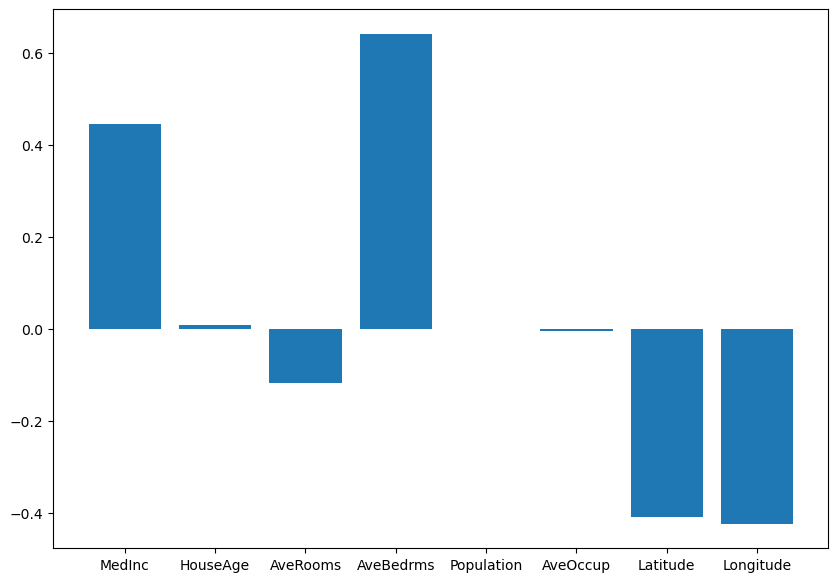

In [607]:
plt.figure(figsize=(10, 7)) # グラフのサイズを指定
plt.bar(columns, model.coef_) # 棒グラフを作成

In [608]:
model.intercept_ # 切片, バイアス

-36.01222888765237

学習用データとテストデータを使用して，学習済みモデルの評価を行います

In [609]:
print(f"train score: {model.score(x_train, t_train):.3f}") # 決定係数 1に近いほど良い
print(f"test score: {model.score(x_test, t_test):.3f}")  # 決定係数 1に近いほど良い

train score: 0.611
test score: 0.593


学習用データに当てはまり過ぎてしまい，テストデータと評価に大きな差が出てしまうことを過学習といいます

In [610]:
x_test.shape # テストデータのサイズ

(6192, 8)

In [611]:
y = model.predict(x_test) # 予測値を計算

以下のように，予測値と目標値は近いものから離れているものまであります

In [612]:
print("予測値: ", y[:5]) # 予測値と目標値を比較
print("目標値: ", t_test[:5]) 

予測値:  [2.2702672  2.79059912 1.90984782 1.03160505 2.98015599]
目標値:  [1.369 2.413 2.007 0.725 4.6  ]


### 過学習を抑制するには

### 過学習を抑制するには以下の方法が有効です  
- データセットのサンプル数を増やす  
- ハイパーパラメータを使用する  
- ほかのアルゴリズムを使用する

In [613]:
df = pd.read_csv("Python機械学習/regression_pls.csv") # データセットの読み込み

以下，先ほどと同じ流れで機械学習を行います

In [614]:
df.head() # データの確認

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1


In [615]:
df.shape # データのサイズ

(1290, 197)

In [616]:
t =  df['Target'].values # 目標変数を取り出す
x = df.drop(labels='Target', axis=1).values # 目標変数を削除

In [617]:
t.shape, x.shape # 目標変数と特徴量のサイズを確認

((1290,), (1290, 196))

In [618]:
x_train, x_test, t_train, t_test =  train_test_split(x, t, test_size=0.3, random_state=0)

In [619]:
model = LinearRegression()

In [620]:
model.fit(x_train, t_train)

LinearRegression()

In [621]:
print(f"train score: {model.score(x_train, t_train):.3f}")
print(f"test score: {model.score(x_test, t_test):.3f}")

train score: 0.937
test score: -0.012


結果から過学習が起きていることがわかります

今回は，相関の高い入力変数が含まれているので，この問題を解決します．  
では，まず相関関係を見ていきましょう

In [622]:
df_corr = df.corr() # 相関係数を計算

In [623]:
plt.figure(figsize=(17, 11)) # グラフのサイズを指定

<Figure size 1700x1100 with 0 Axes>

<Figure size 1700x1100 with 0 Axes>

<AxesSubplot: >

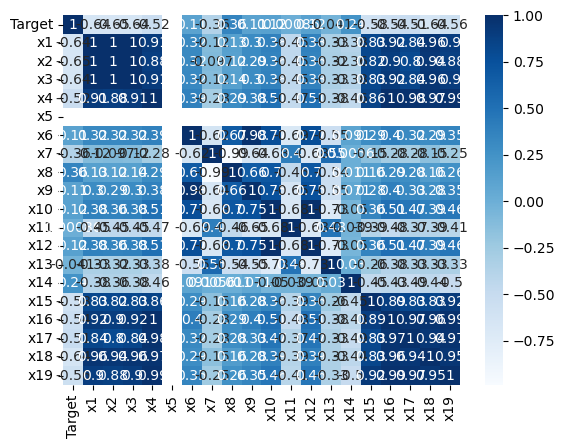

In [624]:
sns.heatmap(df_corr.iloc[:20, :20], annot=True, cmap='Blues') # 相関係数をヒートマップで表示

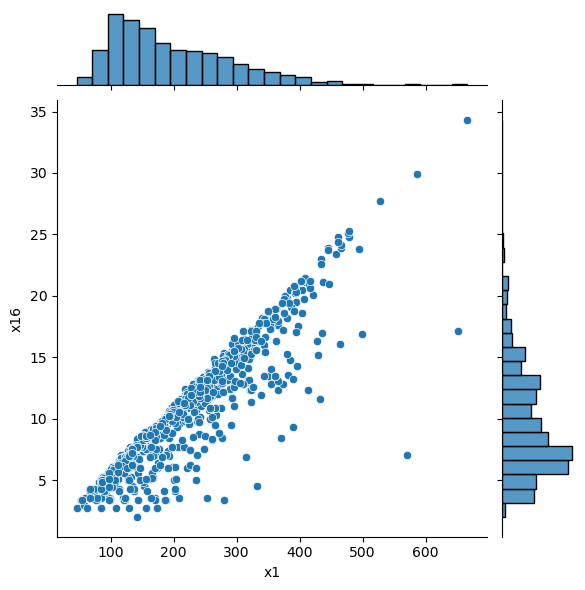

In [625]:
sns.jointplot(x='x1', y='x16', data=df) # x1とx16の散布図を表示

### PLS(Partial Least Squares)  
これより，PLSを使用した多重共線性を考慮した機械学習を行います

In [626]:
from sklearn.cross_decomposition import PLSRegression

In [627]:
pls = PLSRegression(n_components=7) # モデルの宣言 n_components: 主成分の数

In [628]:
pls.fit(x_train, t_train) # 学習 多重共線性を考慮した線形回帰

PLSRegression(n_components=7)

In [629]:
print(f"train score: {pls.score(x_train, t_train):.3f}")
print(f"test score: {pls.score(x_test, t_test):.3f}") #前よりも決定係数が上がった

train score: 0.906
test score: 0.739
